In [14]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "speedup_openmp_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_17810_consist_p1-p2-p4_openmp.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

NumberThreads  P1_ElapsedTime  P2_ElapsedTime  P4_ElapsedTime  P1_SpeedUp  P2_SpeedUp  P4_SpeedUp  P1_Efficiency  P2_Efficiency  P4_Efficiency  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0              1         91.2671        551.2162       8887.5238      1.0000      1.0000      1.0000         1.0000         1.0000         1.0000                0.170                0.175                0.277                 98.97                 99.06                 99.61
1              2         63.6319        312.4745       4853.7092      1.4342      1.7640      1.8310         0.7171         0.8820         0.9155                0.182                0.217                0.322                 98.37                 98.16                 99.23
2              4         33.6115        156.4623       2514.3724      2.7153      3.5229      3.5346         0.6788         0.8807         0.8836                0.202                0.248                0.340                 96.94                 96.36                 98.52
3              8         19.6153         83.5681       1316.5791      4.6528      6.5960      6.7504         0.5816         0.8245         0.8438                0.231                0.256                0.361                 94.54                 93.20                 97.20
4             16         14.7714         48.2682        729.1442      6.1786     11.4198     12.1889         0.3861         0.7137         0.7618                0.285                0.278                0.394                 92.55                 88.11                 94.95
5             20         12.9908         44.0150        646.0799      7.0255     12.5233     13.7560         0.3512         0.6261         0.6878                0.283                0.321                0.415                 91.48                 87.16                 94.33
6             40         10.1526         40.4684        577.9301      8.9895     13.6209     15.3781         0.2247         0.3405         0.3844                0.274                0.287                0.428                 88.62                 84.75                 93.47

In [15]:
# Rename columns
df_speedup = df.rename(columns={"P1_SpeedUp": "P1", "P2_SpeedUp": "P2", "P4_SpeedUp": "P4"})
df_speedup.columns

Index(['NumberThreads', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1', 'P2', 'P4', 'P1_Efficiency', 'P2_Efficiency', 'P4_Efficiency',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

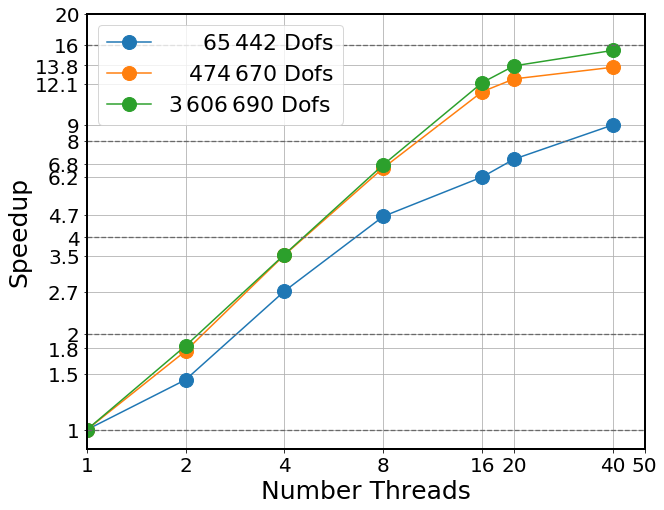

In [16]:
select_columns=['NumberThreads', 'P1', 'P2', 'P4']

fig = df_speedup[select_columns].plot(
    kind='line', 
    x='NumberThreads', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50], fontsize=20)
plt.yticks([1, 1.5, 1.8, 2, 2.7, 3.5, 4, 4.7, 6.2, 6.8, 8, 9, 12.1, 13.8, 16, 20], [1, 1.5, 1.8, 2, 2.7, 3.5, 4, 4.7, 6.2, 6.8, 8, 9, 12.1, 13.8, 16, 20], fontsize=20)

lines = [1, 2, 4, 8, 16]
for i in lines:
    plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('Speedup', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [17]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [18]:
# Rename columns
df_efficiency = df.rename(columns={"P1_Efficiency": "P1", "P2_Efficiency": "P2", "P4_Efficiency": "P4"})
df_efficiency.columns

Index(['NumberThreads', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1_SpeedUp', 'P2_SpeedUp', 'P4_SpeedUp', 'P1', 'P2', 'P4',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

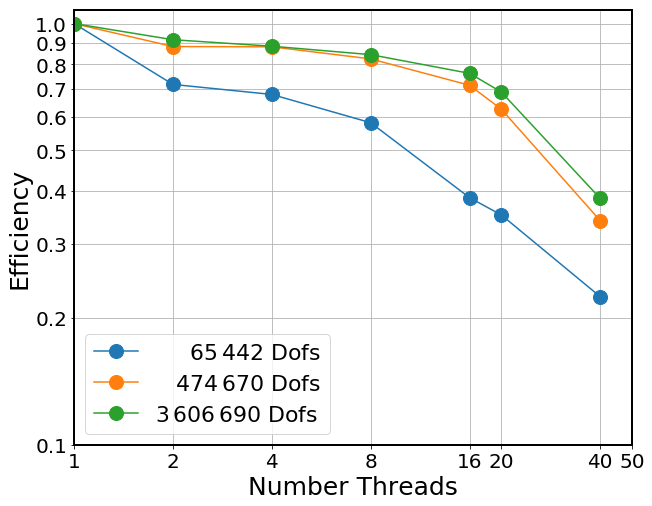

In [19]:
select_columns=['NumberThreads', 'P1', 'P2', 'P4']

fig = df_efficiency[select_columns].plot(
    kind='line', 
    x='NumberThreads', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50], fontsize=20)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('Efficiency', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [20]:
fname = "efficiency_openmp_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [21]:
# Select columns
select_columns=['NumberThreads', 'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)']
df_cache = df[select_columns].copy()
# Calculate percentage multiply by 100.
df_cache["P1_L2-Cache-Miss(%)"] = df_cache["P1_L2-Cache-Miss(%)"]*100
df_cache["P2_L2-Cache-Miss(%)"] = df_cache["P2_L2-Cache-Miss(%)"]*100
df_cache["P4_L2-Cache-Miss(%)"] = df_cache["P4_L2-Cache-Miss(%)"]*100
df_cache

NumberThreads  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)
0              1                 17.0                 17.5                 27.7
1              2                 18.2                 21.7                 32.2
2              4                 20.2                 24.8                 34.0
3              8                 23.1                 25.6                 36.1
4             16                 28.5                 27.8                 39.4
5             20                 28.3                 32.1                 41.5
6             40                 27.4                 28.7                 42.8

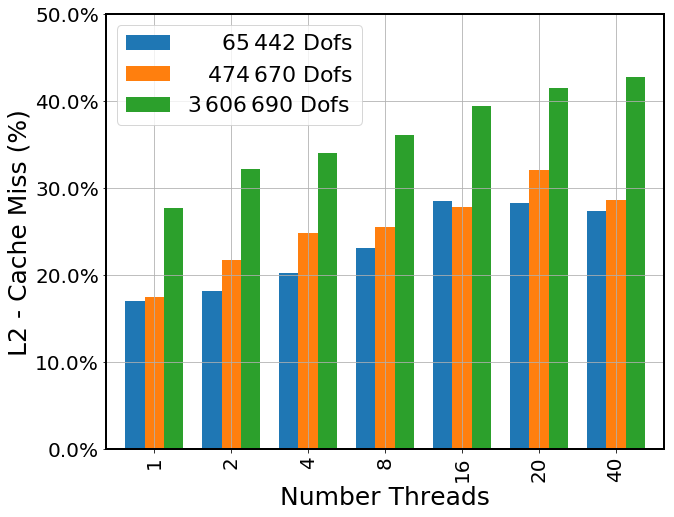

In [22]:
fig = df_cache[["NumberThreads", "P1_L2-Cache-Miss(%)", "P2_L2-Cache-Miss(%)", "P4_L2-Cache-Miss(%)"]].plot(
    kind='bar', 
    x='NumberThreads',
    width=0.75,
    figsize=(10, 8)
).get_figure()

# plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50])
plt.xticks(fontsize=20)
plt.yticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0], ["0.0%", "10.0%", "20.0%", "30.0%", "40.0%", "50.0%"], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('L2 - Cache Miss (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [23]:
fname = "l2-cache-miss_openmp_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [24]:
# Select columns
select_columns=['NumberThreads', 'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)']
df_region = df[select_columns].copy()
df_region

NumberThreads  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0              1                 98.97                 99.06                 99.61
1              2                 98.37                 98.16                 99.23
2              4                 96.94                 96.36                 98.52
3              8                 94.54                 93.20                 97.20
4             16                 92.55                 88.11                 94.95
5             20                 91.48                 87.16                 94.33
6             40                 88.62                 84.75                 93.47

[94.54, 92.55, 91.48, 88.62, 93.2, 88.11, 87.16, 84.75, 97.2, 94.95, 94.33, 93.47]


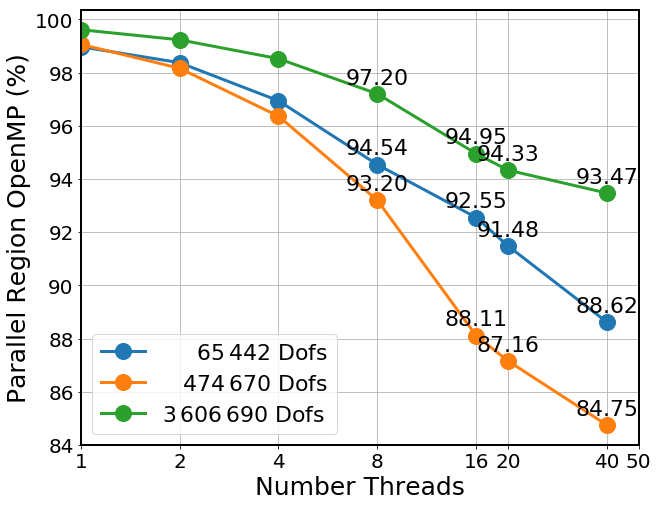

In [25]:
fig = df_region.plot(
    kind='line', 
    x='NumberThreads',
    marker='o',
    markersize=16,
#     alpha=0.3,
    linewidth=3.0,
#     ylim=(0,300),
    figsize=(10, 8)
).get_figure()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50])
# plt.yticks([50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0], [50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0])


xs=list(df_region["NumberThreads"][3:7])+list(df_region["NumberThreads"][3:7])+list(df_region["NumberThreads"][3:7])
ys=list(df_region["P1_ParallelRegion(%)"][3:7])+list(df_region["P2_ParallelRegion(%)"][3:7])+list(df_region["P4_ParallelRegion(%)"][3:7])
print(ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 fontsize=22,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('Parallel Region OpenMP (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.35, 0.22), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [26]:
fname = "parallel_region_openmp_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>